In [6]:
import os
import glob
from tqdm import tqdm

import numpy as np
import pandas as pd
import torch

In [7]:
import data_processor
from utils.visualization_tools import plot_central_cuts, plot_certain_cuts

## 0. Testing data loading for `Segmentation`

### 0.1 Dataset with FCD patients, data with `bb` segmented lesions - in `mask_path`.

  3%|▎         | 1/30 [00:00<00:03,  8.07it/s]

Assembling data for: pirogov sample.


100%|██████████| 30/30 [00:02<00:00, 12.08it/s]




Dataset size: 29
Labels distribution: (array([1]), array([29]))

Image shape: torch.Size([1, 192, 192, 192])
Segmentation shape: torch.Size([1, 192, 192, 192])


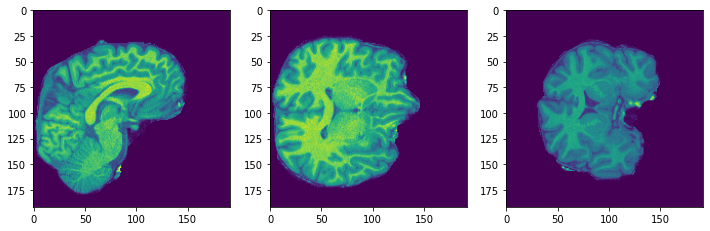

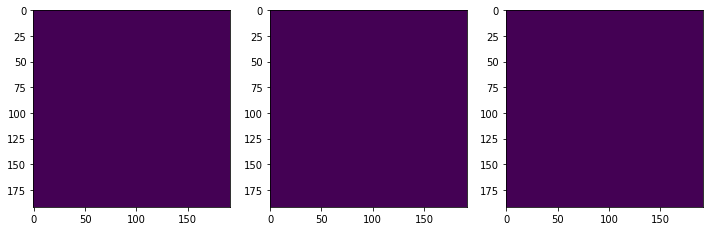

In [8]:
pirogov_bb_data = data_processor.DataMriSegmentation(sample='pirogov', mask='bb', ignore_missing=True,
                         coord_min=(30,30,30,), img_shape=(192, 192, 192,),
                         mask_path='../../datasets/fcd_classification_bank/masks/bb',
                         image_path= '../../datasets/fcd_classification_bank',
                         targets_path= 'targets/targets_fcd_bank.csv')

print('\n')
print(f'Dataset size: {len(pirogov_bb_data)}')
print(f'Labels distribution: {np.unique(pirogov_bb_data.target, return_counts=True)}\n')

#Example of data 
img, seg = pirogov_bb_data[1]
print("Image shape: {}".format(img.shape))
print("Segmentation shape: {}".format(seg.shape))
plot_central_cuts(img)
plot_central_cuts(seg)

In [9]:
def get_center_coord_of_fcd_from_segmentation(img):
    
    if isinstance(img, torch.Tensor):
        img = img.numpy()
        if (len(img.shape) > 3):
            img = img[0,:,:,:]
                
    elif isinstance(img, nibabel.nifti1.Nifti1Image):    
        img = img.get_fdata()
    
    axial_coord = []
    for i in range(img.shape[2]):
        if (img[:, :, i] != 0).any():
            axial_coord.append(i)
    axial_center_coord = (min(axial_coord)+max(axial_coord))//2 
    
    coronal_coord = []
    for i in range(img.shape[1]):
        if (img[:, i, :] != 0).any():
            coronal_coord.append(i)
    coronal_center_coord = (min(coronal_coord)+max(coronal_coord))//2 
    
    sagital_coord = []
    for i in range(img.shape[0]):
        if (img[i, :, :] != 0).any():
            sagital_coord.append(i)
    sagital_center_coord = (min(sagital_coord)+max(sagital_coord))//2 

                        
    return sagital_center_coord, coronal_center_coord, axial_center_coord

In [12]:
a = get_center_coord_of_fcd_from_segmentation(seg)

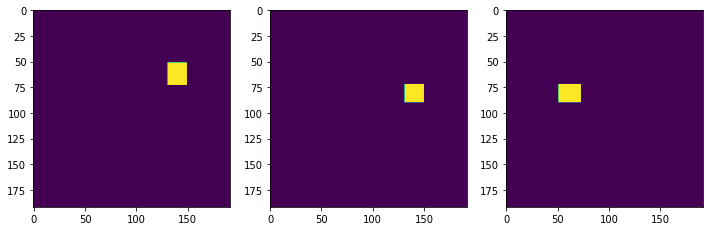

In [13]:
plot_certain_cuts(seg, a)

In [7]:
pirogov_bb_data.img_files.loc[0]

'../../datasets/fcd_classification_bank/fcd_0_1_norm.nii.gz'

In [18]:
import matplotlib.pyplot as plt

def plot_img(img, cmap = 'gray'):
    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap=cmap)
    plt.show()

def vary_coordinate(img, coordinate_sagital, coordinate_coronal, coordinate_axial, axis = None):
    if axis == None:
        pass
    if axis == 'sagital':
        plot_img(img[0, coordinate_sagital,:,:])
    if axis == 'coronal':
        plot_img(img[0, :,coordinate_coronal ,:])
    if axis == 'axial':
        plot_img(img[0, :,:, coordinate_axial])

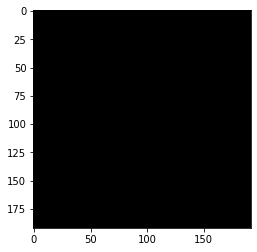

In [28]:
vary_coordinate(seg.numpy(), 
                coordinate_sagital = 100,
                coordinate_coronal = 100,
                coordinate_axial = 180,
                axis = 'axial')

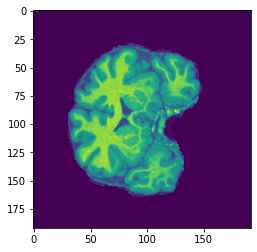

In [32]:
plt.imshow(img.numpy()[0, :,:,100])